# Task 2 Prediction using Unsupervised ML
### From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually. 
## By [Lakshya Bansal](http://www.lakshyabansal.me/)

**Loading Dependencies**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

**Loading Dataset**

In [2]:
iris_data=pd.read_csv("iris.csv")
iris_data.set_index("Id",inplace=True)
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


**Finding optimal no of clusters using Elbow Method**

In [3]:
X=iris_data.iloc[:,[0,1,2,3]].values
ssd=[]
for i in range(1,16):
    km=KMeans(n_clusters=i)
    km.fit(X)
    ssd.append(km.inertia_)

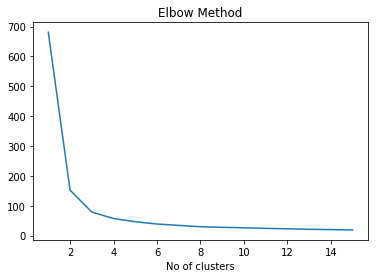

In [4]:
plt.plot(range(1,16),ssd)
plt.title("Elbow Method")
plt.xlabel("No of clusters")
plt.show()

In the above visualization of elbow method we can say 3 is the most efficient choice for no of clusters.

**Training Model**

In [5]:
km=KMeans(n_clusters=3,max_iter=300,n_init=12,random_state=1,init="k-means++")
km.fit(X)
labels=km.labels_
cluster_centers=km.cluster_centers_
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


**Visualizing Kmeans clusters for SepalLength and SepalWidth**

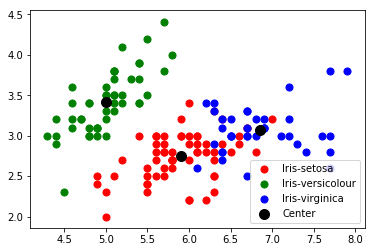

In [6]:
colors=["red","green","blue"]
legend_labels=['Iris-setosa','Iris-versicolour','Iris-virginica']
for i in range(3):
    plt.scatter(X[labels==i,0],X[labels==i,1],s=50,c=colors[i],label=legend_labels[i])
plt.scatter(cluster_centers[:,0],cluster_centers[:,1],c="black",s=100,label="Center")
plt.legend()
plt.show()

**Visualizing Kmeans clusters for PetalLength and PetalWidth**

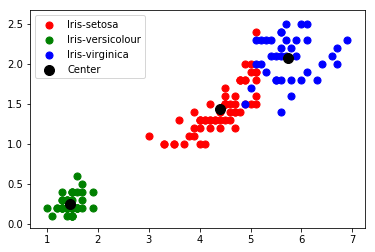

In [7]:
colors=["red","green","blue"]
legend_labels=['Iris-setosa','Iris-versicolour','Iris-virginica']
for i in range(3):
    plt.scatter(X[labels==i,2],X[labels==i,3],s=50,c=colors[i],label=legend_labels[i])
plt.scatter(cluster_centers[:,2],cluster_centers[:,3],c="black",s=100,label="Center")
plt.legend()
plt.show()